# LIBRARIES #

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix)
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats

# Importing Dataset #

In [177]:
df=pd.read_csv("Sub_Division_IMD_2017.csv")

In [178]:
df.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,Andaman & Nicobar Islands,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,Andaman & Nicobar Islands,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,Andaman & Nicobar Islands,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,Andaman & Nicobar Islands,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,Andaman & Nicobar Islands,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


# Data Preprocessing 

In [179]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [180]:
print(df.describe())

              YEAR          JAN          FEB          MAR          APR  \
count  4188.000000  4184.000000  4185.000000  4182.000000  4184.000000   
mean   1959.220630    18.938337    21.599427    27.412912    43.071845   
std      33.717097    33.793128    35.731734    46.927963    68.150985   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.500000     1.000000     3.000000   
50%    1959.000000     5.950000     6.500000     7.900000    15.450000   
75%    1988.000000    22.000000    26.600000    31.375000    49.650000   
max    2017.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4185.000000  4183.000000  4181.000000  4184.000000  4182.000000   
mean     85.660860   230.117475   347.020043   289.742185   197.316332   
std     122.695137   234.292087   268.850702   188.426071   135.547646   
min       0.000000     0.400000     0

In [181]:
df.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [182]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [183]:
df.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [184]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [185]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [186]:
df.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

In [187]:
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [188]:
for col in num_cols:
    df[col] = StandardScaler().fit_transform(df[[col]])

In [189]:
df.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,0,-1.726945,0.896033,1.833997,0.038113,-0.598615,3.613435,1.227479,0.067313,1.016166,0.998888,2.958376,7.598861,0.340286,2.182709,1.616645,2.012752,0.896153,4.962369
1,0,-1.697283,-0.560755,3.869575,-0.324447,-0.632384,2.939085,1.311195,-0.439772,2.463752,3.462074,1.028004,4.680637,3.291643,2.346655,2.013307,1.505184,1.589895,3.379984
2,0,-1.667621,-0.184714,3.427180,-0.584638,-0.617702,1.218553,1.066880,1.419913,0.196257,1.046143,0.866551,3.587768,4.791741,1.720547,1.960981,0.399481,1.147946,3.223306
3,0,-1.637959,-0.282425,-0.193182,-0.584638,2.339267,1.784453,1.131803,0.577005,-0.688438,4.600634,1.280275,3.943756,0.491459,1.856372,-0.277208,1.747025,1.294743,2.505350
4,0,-1.608297,-0.522262,-0.604777,-0.514258,-0.237436,1.580599,1.702441,0.080717,0.216436,0.736030,1.668771,-0.206509,7.575645,1.286284,-0.662055,0.765727,0.794982,2.864328


# OUTLIER DETECTION & REMOVAL (IQR METHOD)

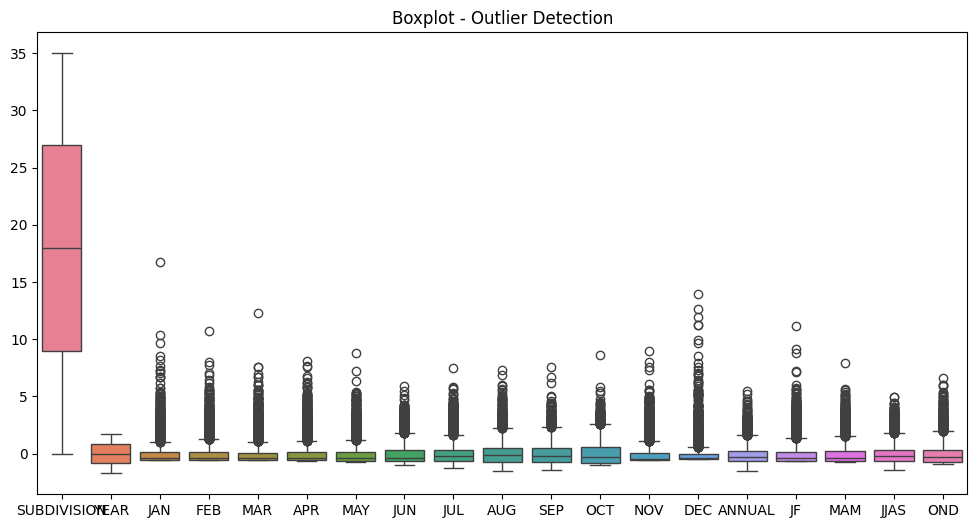

In [190]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot - Outlier Detection")
plt.show()

In [191]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df = remove_outliers_iqr(df, num_cols)

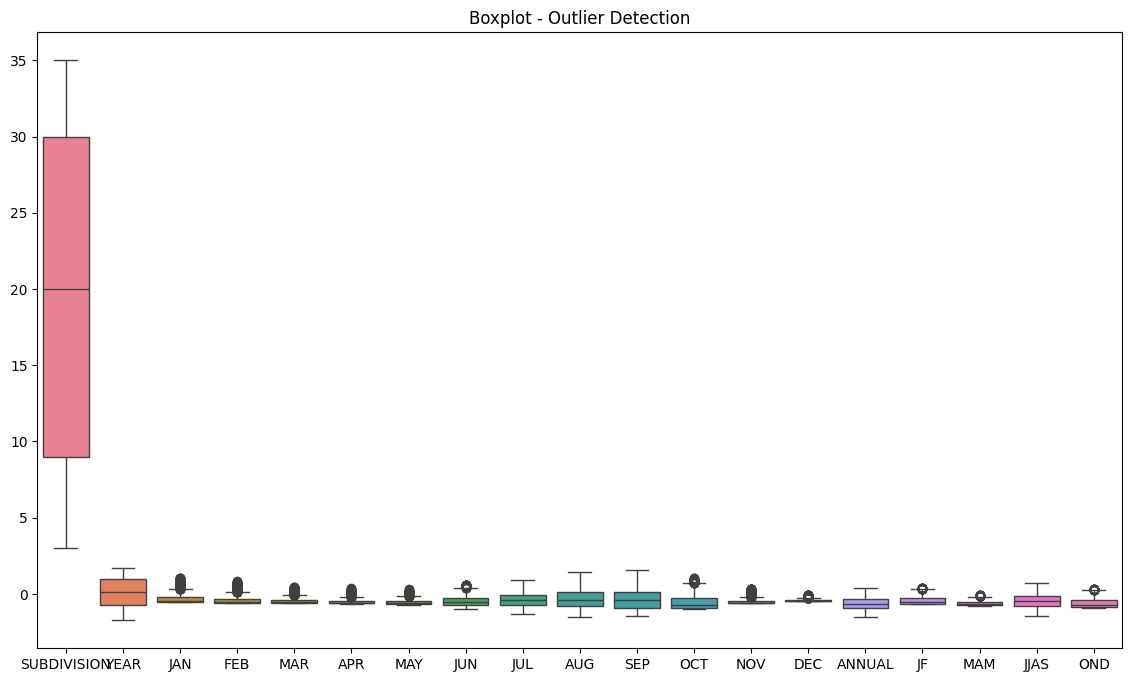

In [192]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot - Outlier Detection")
plt.show()

# Correlation Heatmap and covariance

In [193]:
df.corr()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
SUBDIVISION,1.000000,-0.031101,-0.118729,-0.120932,-0.062640,-0.076576,-0.166775,-0.185217,-0.274015,-0.281959,-0.235746,-0.073916,0.026253,0.017598,-0.336696,-0.158446,-0.162493,-0.338970,-0.060686
YEAR,-0.031101,1.000000,-0.075463,-0.022317,0.006831,0.008103,0.050177,0.066860,-0.003160,0.031864,-0.018617,0.054406,-0.052444,-0.032852,0.028041,-0.065258,0.039893,0.022692,0.034932
JAN,-0.118729,-0.075463,1.000000,0.127376,0.122464,0.061934,-0.039455,0.020713,0.106094,0.193104,0.070876,-0.012403,-0.044044,0.092481,0.166896,0.768205,0.031784,0.144552,-0.015888
FEB,-0.120932,-0.022317,0.127376,1.000000,0.246003,0.117653,0.135838,0.071303,0.097061,0.159792,0.111788,0.022598,-0.028865,0.116737,0.199268,0.732185,0.210977,0.153481,0.022140
MAR,-0.062640,0.006831,0.122464,0.246003,1.000000,0.202113,0.141398,0.069946,0.053533,0.115755,0.120370,0.067629,-0.030304,0.125519,0.175745,0.241914,0.473636,0.121191,0.064182
APR,-0.076576,0.008103,0.061934,0.117653,0.202113,1.000000,0.387315,0.232627,0.074826,0.117163,0.184873,0.289837,0.112084,0.078323,0.290102,0.117664,0.688201,0.191855,0.302581
MAY,-0.166775,0.050177,-0.039455,0.135838,0.141398,0.387315,1.000000,0.302507,0.064579,0.091906,0.208272,0.381245,0.131503,0.030634,0.330468,0.060637,0.877234,0.203081,0.388763
JUN,-0.185217,0.066860,0.020713,0.071303,0.069946,0.232627,0.302507,1.000000,0.336820,0.394033,0.338463,0.313444,0.112074,-0.044630,0.666325,0.059945,0.314827,0.649103,0.315606
JUL,-0.274015,-0.003160,0.106094,0.097061,0.053533,0.074826,0.064579,0.336820,1.000000,0.460398,0.375505,0.104677,0.021602,0.050914,0.736317,0.135724,0.087889,0.780523,0.106205
AUG,-0.281959,0.031864,0.193104,0.159792,0.115755,0.117163,0.091906,0.394033,0.460398,1.000000,0.389360,0.171664,0.058419,0.009039,0.766501,0.234945,0.140951,0.793694,0.174524


In [194]:
df.cov()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
SUBDIVISION,113.851153,-0.332900,-0.417836,-0.377274,-0.142916,-0.141873,-0.334129,-0.667230,-1.334908,-1.906619,-1.735384,-0.375135,0.052332,0.016070,-1.356133,-0.462926,-0.285444,-1.571164,-0.197567
YEAR,-0.332900,1.006360,-0.024968,-0.006546,0.001465,0.001411,0.009452,0.022645,-0.001447,0.020257,-0.012884,0.025960,-0.009829,-0.002821,0.010618,-0.017926,0.006589,0.009889,0.010692
JAN,-0.417836,-0.024968,0.108783,0.012283,0.008637,0.003547,-0.002443,0.002306,0.015976,0.040363,0.016127,-0.001946,-0.002714,0.002611,0.020779,0.069378,0.001726,0.020711,-0.001599
FEB,-0.377274,-0.006546,0.012283,0.085485,0.015380,0.005973,0.007457,0.007038,0.012957,0.029608,0.022549,0.003143,-0.001577,0.002921,0.021993,0.058618,0.010155,0.019494,0.001975
MAR,-0.142916,0.001465,0.008637,0.015380,0.045721,0.007504,0.005677,0.005049,0.005226,0.015686,0.017757,0.006878,-0.001211,0.002297,0.014185,0.014164,0.016673,0.011257,0.004187
APR,-0.141873,0.001411,0.003547,0.005973,0.007504,0.030150,0.012628,0.013637,0.005932,0.012893,0.022146,0.023937,0.003636,0.001164,0.019015,0.005594,0.019673,0.014471,0.016030
MAY,-0.334129,0.009452,-0.002443,0.007457,0.005677,0.012628,0.035256,0.019177,0.005536,0.010936,0.026979,0.034049,0.004613,0.000492,0.023423,0.003118,0.027117,0.016564,0.022272
JUN,-0.667230,0.022645,0.002306,0.007038,0.005049,0.013637,0.019177,0.113986,0.051920,0.084308,0.078835,0.050334,0.007069,-0.001290,0.084919,0.005542,0.017499,0.095199,0.032511
JUL,-1.334908,-0.001447,0.015976,0.012957,0.005226,0.005932,0.005536,0.051920,0.208457,0.133214,0.118279,0.022732,0.001843,0.001989,0.126902,0.016968,0.006606,0.154805,0.014795
AUG,-1.906619,0.020257,0.040363,0.029608,0.015686,0.012893,0.010936,0.084308,0.133214,0.401623,0.170233,0.051745,0.006916,0.000490,0.183365,0.040770,0.014706,0.218501,0.033746


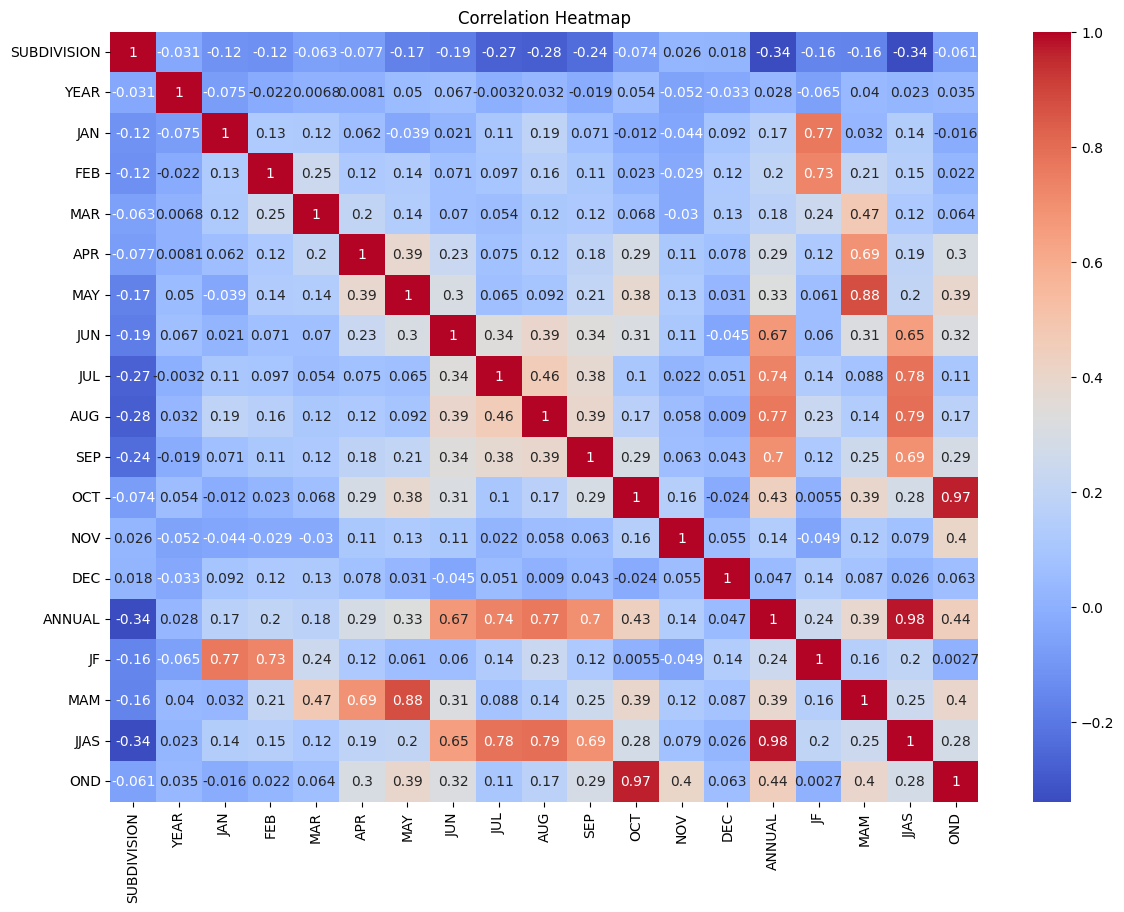

In [195]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Supervised Learning (Regression)

In [196]:
x = df.drop("ANNUAL", axis=1)
y = df["ANNUAL"]

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [198]:
lr = LinearRegression()
lr.fit(x_train, y_train)
yp = lr.predict(x_test)

In [199]:
r2=r2_score(y_test,yp)

In [200]:
print(r2)

0.9893342934584987


In [201]:
mse=mean_squared_error(y_test,yp)

In [202]:
print(mse)

0.0014880911122467453


In [203]:
mae=mean_absolute_error(y_test,yp)

In [204]:
print(mae)

0.001806810198780295


In [205]:
rmse=np.sqrt(mse)
print(rmse)

0.038575784013377426


In [206]:
poly = PolynomialFeatures(degree=3)

In [207]:
x_poly=poly.fit_transform(x_train)

In [208]:
x_test_poly=poly.transform(x_test)

In [209]:
poly_lr = LinearRegression()
poly_lr.fit(x_poly, y_train) 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [210]:
pp = poly_lr.predict(x_test_poly)

In [211]:
print("R2 Score:", r2_score(y_test, pp))

R2 Score: 0.7349521727675543


In [212]:
df["HighRain"] = (df["ANNUAL"] > df["ANNUAL"].median()).astype(int)
x = df.drop(["ANNUAL", "HighRain"], axis=1)
y = df["HighRain"]

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [214]:
lgr= LogisticRegression(max_iter=500)

In [215]:
lgr.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [216]:
lp=lgr.predict(x_test)

In [217]:
accuracy_score(y_test,lp)

0.9875389408099688

# Supervised Learning (Classification)

In [218]:
knn = KNeighborsClassifier(n_neighbors=5)

In [219]:
knn.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [220]:
pknn=knn.predict(x_test)

In [221]:
accuracy_score(y_test,pknn)

0.9252336448598131

In [222]:
nb = GaussianNB()

In [223]:
nb.fit (x_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [224]:
pnb=nb.predict(x_test)

In [225]:
accuracy_score(y_test,pnb)

0.9470404984423676

In [226]:
dt = DecisionTreeClassifier()

In [227]:
dt.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [228]:
pdt=dt.predict(x_test)

In [229]:
accuracy_score(y_test,pdt)

0.9595015576323987

In [230]:
svm = SVC(probability=True)

In [231]:
svm.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [232]:
psvm = svm.predict(x_test)

In [233]:
accuracy_score(y_test, psvm)

0.9158878504672897

In [234]:
precision_score(y_test,pdt)

0.959731543624161

In [235]:
recall_score(y_test,pdt)

0.9533333333333334

In [236]:
f1_score(y_test,pdt)

0.9565217391304348

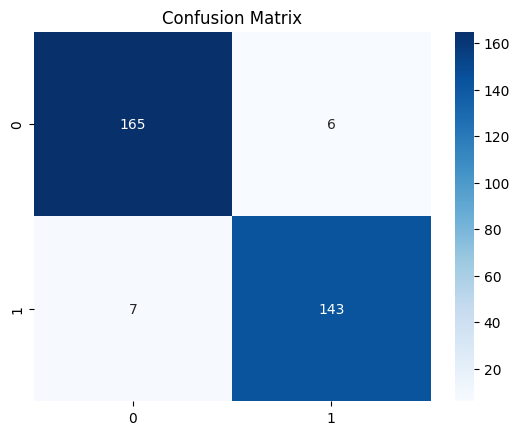

In [237]:
cm = confusion_matrix(y_test, pdt)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [238]:
ppsvm = svm.predict_proba(x_test)[:,1]

In [239]:
roc_auc_score(y_test,ppsvm)

0.9785185185185185

# Unsupervised Learning

In [240]:
x_cluster = df.select_dtypes(include=np.number)

In [241]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_cluster)
    inertia.append(km.inertia_)

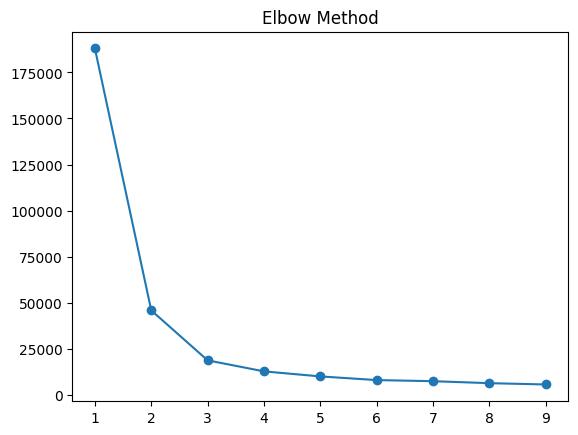

In [242]:
plt.plot(range(1,10), inertia, marker='o')
plt.title("Elbow Method")
plt.show()

In [243]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(x_cluster)

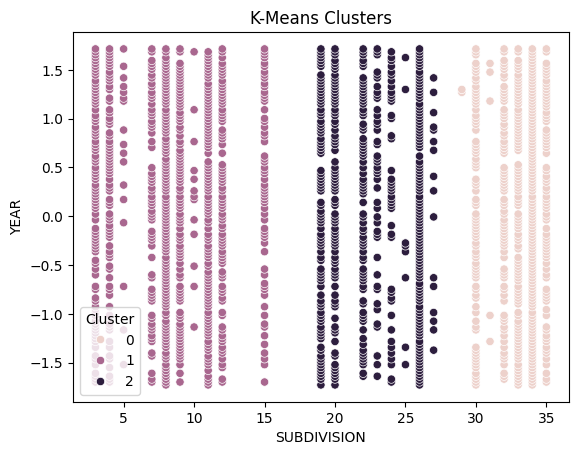

In [244]:
sns.scatterplot(x=x_cluster.iloc[:,0],y=x_cluster.iloc[:,1],hue=df["Cluster"])
plt.title("K-Means Clusters")
plt.show()

In [245]:
Z= linkage(x_cluster, method='ward')

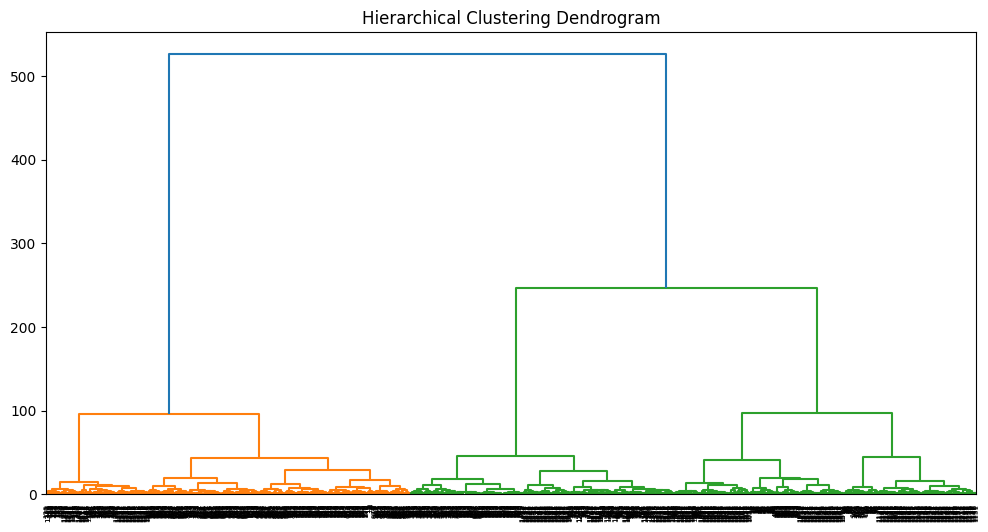

In [246]:
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [247]:
from mlxtend.frequent_patterns import apriori, association_rules

In [248]:
sample = {'Milk':[1,0,1,1],'Bread':[1,1,0,1],'Butter':[0,1,1,1],'Tea':[1,0,0,1]}

In [249]:
basket = pd.DataFrame(sample)

In [250]:
freq_items = apriori(basket, min_support=0.5, use_colnames=True)

C:\env2\python\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [251]:
rules = association_rules(freq_items, metric='lift', min_threshold=1)

In [252]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
     antecedents    consequents  antecedent support  consequent support  \
0          (Tea)         (Milk)                0.50                0.75   
1         (Milk)          (Tea)                0.75                0.50   
2          (Tea)        (Bread)                0.50                0.75   
3        (Bread)          (Tea)                0.75                0.50   
4    (Tea, Milk)        (Bread)                0.50                0.75   
5   (Tea, Bread)         (Milk)                0.50                0.75   
6  (Bread, Milk)          (Tea)                0.50                0.50   
7          (Tea)  (Bread, Milk)                0.50                0.50   
8         (Milk)   (Tea, Bread)                0.75                0.50   
9        (Bread)    (Tea, Milk)                0.75                0.50   

   support  confidence      lift  representativity  leverage  conviction  \
0      0.5    1.000000  1.333333               1.0     0.125         inf   
1 

In [253]:
print(freq_items)

   support            itemsets
0     0.75              (Milk)
1     0.75             (Bread)
2     0.75            (Butter)
3     0.50               (Tea)
4     0.50       (Bread, Milk)
5     0.50      (Milk, Butter)
6     0.50         (Tea, Milk)
7     0.50     (Bread, Butter)
8     0.50        (Tea, Bread)
9     0.50  (Tea, Bread, Milk)
